In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [124]:
data=pd.read_csv("Churn_Modelling.csv")

In [125]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [127]:
data.duplicated().sum()

0

In [128]:
data['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [129]:
data['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [130]:
data['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [131]:
data.drop(columns=["RowNumber","CustomerId","Surname"],inplace=True)

In [132]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [133]:
data=pd.get_dummies(data,columns=["Geography","Gender"],drop_first=True)

In [134]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [135]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [136]:
x=data.drop(columns=["Exited"])
y=data["Exited"]

In [137]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [138]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [139]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [140]:
x_train_scaled

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [141]:
x_test_scaled

array([[-0.57749609, -0.6557859 , -0.69539349, ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.29729735,  0.3900109 , -1.38944225, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.52560743,  0.48508334, -0.3483691 , ..., -0.57946723,
         1.73494238, -1.09499335],
       ...,
       [ 0.81311987,  0.77030065,  0.69270405, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.41876609, -0.94100321, -0.3483691 , ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.24540869,  0.00972116, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [142]:
y_train

9254    0
1561    0
1670    1
6087    1
6669    1
       ..
5734    0
5191    0
5390    1
860     1
7270    0
Name: Exited, Length: 8000, dtype: int64

In [143]:
y_test

6252    0
4684    0
1731    0
4742    0
4521    0
       ..
6412    1
8285    0
7853    1
1095    1
6929    1
Name: Exited, Length: 2000, dtype: int64

In [144]:
x_train_scaled.shape

(8000, 11)

In [145]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [174]:
model=Sequential()

model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(11,activation='relu'))
model.add(Dense(11,activation='relu'))
model.add(Dense(11,activation='relu'))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [175]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_64 (Dense)            (None, 11)                132       
                                                                 
 dense_65 (Dense)            (None, 11)                132       
                                                                 
 dense_66 (Dense)            (None, 11)                132       
                                                                 
 dense_67 (Dense)            (None, 11)                132       
                                                                 
 dense_68 (Dense)            (None, 11)                132       
                                                                 
 dense_69 (Dense)            (None, 11)                132       
                                                                 
 dense_70 (Dense)            (None, 1)               

In [176]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [177]:
history=model.fit(x_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 4s 5ms/step - loss: 0.5230 - accuracy: 0.7806 - val_loss: 0.4594 - val_accuracy: 0.7987
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4488 - accuracy: 0.7934 - val_loss: 0.4297 - val_accuracy: 0.7987
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4271 - accuracy: 0.7973 - val_loss: 0.4141 - val_accuracy: 0.8244
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4063 - accuracy: 0.8258 - val_loss: 0.3972 - val_accuracy: 0.8338
Epoch 5/100
200/200 [==============================] - 1s 5ms/step - loss: 0.3803 - accuracy: 0.8428 - val_loss: 0.3782 - val_accuracy: 0.8419
Epoch 6/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3572 - accuracy: 0.8572 - val_loss: 0.3740 - val_accuracy: 0.8531
Epoch 7/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3467 - accuracy: 0.8619 - val_loss: 0.3645 - val_accuracy: 0.8569

In [178]:
model.layers[6].get_weights()

[array([[ 0.8543876 ],
        [ 0.07704466],
        [ 0.68508613],
        [-0.6878673 ],
        [-0.641696  ],
        [ 1.2600365 ],
        [-0.43838525],
        [-0.34176192],
        [ 0.7005336 ],
        [-0.54549897],
        [-0.6760307 ]], dtype=float32),
 array([0.04216076], dtype=float32)]

In [179]:
y_log=model.predict(x_test_scaled)

63/63 [==============================] - 0s 2ms/step


In [180]:
y_pred=np.where (y_log>0.5,1,0)

In [181]:
from sklearn.metrics import accuracy_score

In [182]:
accuracy_score(y_test,y_pred)

0.858

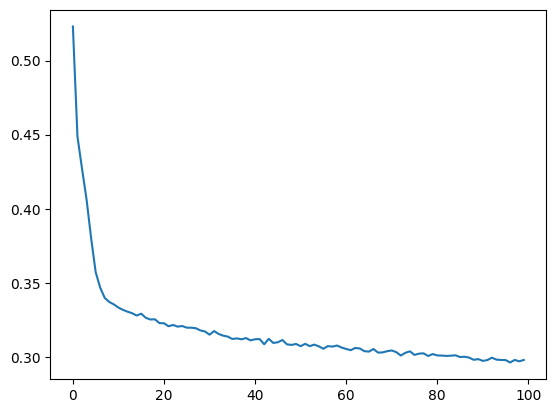

In [183]:
plt.plot(history.history['loss'])
plt.show()

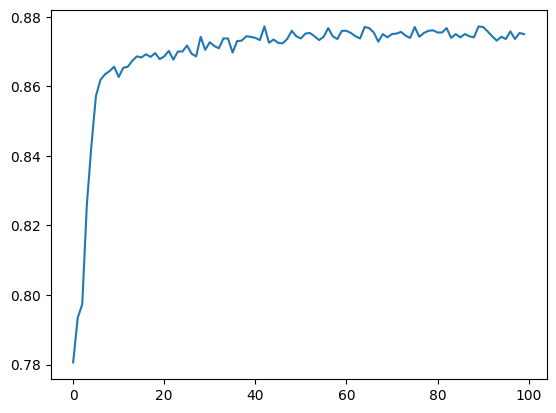

In [184]:
plt.plot(history.history['accuracy'])
plt.show()